## Binary Search Tree (BST)
A binary search tree is a binary tree that satisfies the following conditions:
1. The left subtree of any node only contains nodes with keys less than the node's key.
1. The right subtree of any node only contains nodes with keys greater than the node's key.

In [57]:
# Q. Check whether given tree is binary tree?
# Q. Check the maximum key in binary tree.
# Q. Check the minimum key in binary tree.

def remove_none(nums):
    return [x for x in nums if x is not None]

def is_bst(node):
    if node is None:
        return True, None, None
    
    is_bst_l, min_l, max_l = is_bst(node.left)
    is_bst_r, min_r, max_r = is_bst(node.right)

    is_bst_node = (is_bst_l and is_bst_r 
                   and (max_l is None or node.key > max_l) 
                   and (min_r is None or node.key < min_r))

    min_key = min(remove_none([min_l, node.key, min_r]))
    max_key = max(remove_none([max_l, node.key, max_r]))

    # print(node.key, min_key, max_key, is_bst_node)

    return is_bst_node, min_key, max_key

In [58]:
with open('binary_tree.ipynb', 'r', encoding='utf-8') as f:
    notebook_code = f.read()

exec(notebook_code)

In [59]:
class TreeNode:
    def __init__(self, key):
        self.key, self.left, self.right = key, None, None

    def height(self):
        if self is None:
            return 0
        return 1 + max(TreeNode.height(self.left), TreeNode.height(self.right))

    def size(self):
        if self is None:
            return 0
        return 1 + TreeNode.size(self.left) + TreeNode.size(self.right)

    def traverse_in_order(self):
        if self is None:
            return []
        return (TreeNode.traverse_in_order(self.left) + [self.key] + TreeNode.traverse_in_order(self.right))

    def display_keys(self, space='\t', level=0):
        # If node is empty
        if self is None:
            print(space * level + 'Ø')
            return

        # If the node is a leaf
        if self.left is None and self.right is None:
            print(space * level + str(self.key))
            return

        # If the node has children
        if self.right is not None:
            self.right.display_keys(space, level + 1)
        else:
            print(space * (level + 1) + 'Ø')

        print(space * level + str(self.key))

        if self.left is not None:
            self.left.display_keys(space, level + 1)
        else:
            print(space * (level + 1) + 'Ø')

    def to_tuple(self):
        if self is None:
            return None
        if self.left is None and self.right is None:
            return self.key
        return TreeNode.to_tuple(self.left), self.key, TreeNode.to_tuple(self.right)

    def __str__(self):
        return "BinaryTree <{}>".format(self.to_tuple())

    def _repr__(self):
        return "BinaryTree <{}>".format(self.to_tuple())

    @staticmethod
    def parse_tuple(data):
        if data is None:
            node = None
        elif isinstance(data, tuple) and len(data) == 3:
            node = TreeNode(data[1])
            node.left = TreeNode.parse_tuple(data[0])
            node.right = TreeNode.parse_tuple(data[2])
        else:
            node = TreeNode(data)
        return node


In [60]:
tree1 = TreeNode.parse_tuple(((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8))))

In [61]:
is_bst(tree1)

(False, 1, 8)

In [62]:
tree2 = TreeNode.parse_tuple((('aakash', 'biraj', 'hemanth'), 'jadhesh', ('siddhant', 'sonaksh', 'vishal')))

In [63]:
tree2.display_keys()

		vishal
	sonaksh
		siddhant
jadhesh
		hemanth
	biraj
		aakash


In [64]:
is_bst(tree2)

(True, 'aakash', 'vishal')

#### Storing Key-Value Pairs using BSTs

In [65]:
class BSTNode():
    def __init__(self, key, value = None):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.parent = None        

In [66]:
import nbformat
from IPython.core.interactiveshell import InteractiveShell

# Specify the path to the notebook
notebook_path = 'creating_classes.ipynb'  # Replace with your notebook's filename

# Open and read the notebook
with open(notebook_path, 'r', encoding='utf-8') as f:
    notebook = nbformat.read(f, as_version=4)

# Create an InteractiveShell instance
shell = InteractiveShell.instance()

# Execute each code cell
for cell in notebook.cells:
    if cell.cell_type == 'code':  # Execute only code cells
        print(f"Executing cell: {cell.source}")  # Optional: To see the code being executed
        shell.run_cell(cell.source)

Executing cell: class User:
    pass
Executing cell: user1 = User()
Executing cell: user1


Executing cell: type(user1)


__main__.User

Executing cell: class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
        print('User Created!')
Executing cell: user2 = User('john','John Doe', 'john@doe.com')
User Created!
Executing cell: user2


Executing cell: user2.name


'John Doe'

Executing cell: user2.email, user2.username


('john@doe.com', 'john')

Executing cell: class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
        print('User Created!')
    
    def introduce_yourself(self, guest_name):
        print("Hi {}, I'm {}! Contact me at {}.".format(guest_name, self.name, self.email))
Executing cell: user3 = User('jane', 'Jane Doe', 'jane@doe.com')
User Created!
Executing cell: user3.introduce_yourself('David')
Hi David, I'm Jane Doe! Contact me at jane@doe.com.
Executing cell: class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
        print('User Created!')
    
    def __repr__(self):
        return "User(username = '{}', name = '{}', email = '{}')".format(self.username, self.name, self.email)

    def __str__(self):
        return self.__repr__()    
Executing cell: user5 = User('jane', 'Jane Doe', 'jane@doe.com')
User Created!
Executing cell: 

User(username = 'jane', name = 'Jane Doe', email = 'jane@doe.com')

Executing cell: class UserDatabase:
    def insert(self, user):
        pass

    def find(self, username):
        pass

    def update(self, user):
        pass

    def list_all(self):
        pass        
Executing cell: aakash = User('aakash', 'Aakash Rai', 'aakash@example.com')
biraj = User('biraj', 'Biraj Das', 'biraj@example.com')
hemanth = User('hemanth', 'Hemanth Jain', 'hemanth@example.com')
jadhesh = User('jadhesh', 'Jadhesh Verma', 'jadhesh@example.com')
siddhant = User('siddhant', 'Siddhant Sinha', 'siddhant@example.com')
sonaksh = User('sonaksh', 'Sonaksh Kumar', 'sonaksh@example.com')
vishal = User('vishal', 'Vishal Goel', 'vishal@example.com')
User Created!
User Created!
User Created!
User Created!
User Created!
User Created!
User Created!
Executing cell: users = [aakash, biraj, hemanth, jadhesh, siddhant, sonaksh, vishal]
Executing cell: biraj.username, biraj.email, biraj.name


('biraj', 'biraj@example.com', 'Biraj Das')

Executing cell: print(aakash)
User(username = 'aakash', name = 'Aakash Rai', email = 'aakash@example.com')
Executing cell: users


[User(username = 'aakash', name = 'Aakash Rai', email = 'aakash@example.com'),
 User(username = 'biraj', name = 'Biraj Das', email = 'biraj@example.com'),
 User(username = 'hemanth', name = 'Hemanth Jain', email = 'hemanth@example.com'),
 User(username = 'jadhesh', name = 'Jadhesh Verma', email = 'jadhesh@example.com'),
 User(username = 'siddhant', name = 'Siddhant Sinha', email = 'siddhant@example.com'),
 User(username = 'sonaksh', name = 'Sonaksh Kumar', email = 'sonaksh@example.com'),
 User(username = 'vishal', name = 'Vishal Goel', email = 'vishal@example.com')]

Executing cell: 'biraj' < 'hemanth'


True

Executing cell: class UserDatabase:
    def __init__(self):
        self.users = []
    
    def insert(self, user):
        i=0
        while i < len(self.users):
            # Find the first username greater than the new user's username
            if self.users[i].username > user.username:
                break
            i += 1
        self.users.insert(i, user)
    
    def find(self, username):
        for user in self.users:
            if user.username == username:
                return user
    
    def update(self, user):
        target = self.find(user.username)
        target.name, target.email = user.name, user.email
    
    def list_all(self):
        return self.users
Executing cell: database = UserDatabase()
Executing cell: database.insert(hemanth)
database.insert(aakash)
database.insert(siddhant)
Executing cell: user = database.find('siddhant')
user


User(username = 'siddhant', name = 'Siddhant Sinha', email = 'siddhant@example.com')

Executing cell: database.update(User(username='siddhant',name='Siddhant U', email='siddhantu@example.com'))
User Created!
Executing cell: user = database.find('siddhant')
user


User(username = 'siddhant', name = 'Siddhant U', email = 'siddhantu@example.com')

Executing cell: database.list_all()


[User(username = 'aakash', name = 'Aakash Rai', email = 'aakash@example.com'),
 User(username = 'hemanth', name = 'Hemanth Jain', email = 'hemanth@example.com'),
 User(username = 'siddhant', name = 'Siddhant U', email = 'siddhantu@example.com')]

Executing cell: database.insert(biraj)
Executing cell: database.list_all()


[User(username = 'aakash', name = 'Aakash Rai', email = 'aakash@example.com'),
 User(username = 'biraj', name = 'Biraj Das', email = 'biraj@example.com'),
 User(username = 'hemanth', name = 'Hemanth Jain', email = 'hemanth@example.com'),
 User(username = 'siddhant', name = 'Siddhant U', email = 'siddhantu@example.com')]

Executing cell: %%time
for i in range(100000000):
    j = i*i
CPU times: total: 9.12 s
Wall time: 9.23 s


In [67]:
import nbformat
from IPython.core.interactiveshell import InteractiveShell

# Specify the path to the notebook
notebook_path = 'binary_tree.ipynb'  # Replace with your notebook's filename

# Open and read the notebook
with open(notebook_path, 'r', encoding='utf-8') as f:
    notebook = nbformat.read(f, as_version=4)

# Create an InteractiveShell instance
shell = InteractiveShell.instance()

# Execute each code cell
for cell in notebook.cells:
    if cell.cell_type == 'code':  # Execute only code cells
        print(f"Executing cell: {cell.source}")  # Optional: To see the code being executed
        shell.run_cell(cell.source)

Executing cell: class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
Executing cell: node0 = TreeNode(3)
node1 = TreeNode(4)
node2 = TreeNode(5)
Executing cell: node0


Executing cell: node0.key


3

Executing cell: node0.left = node1
node0.right = node2
Executing cell: tree = node0
Executing cell: tree.key


3

Executing cell: tree.left.key


4

Executing cell: tree.right.key


5

Executing cell: node3 = TreeNode(2)
node4 = TreeNode(3)
node5 = TreeNode(1)
node6 = TreeNode(5)
node7 = TreeNode(3)
node8 = TreeNode(4)
node9 = TreeNode(7)
node10 = TreeNode(6)
node11 = TreeNode(8)
Executing cell: # node3
node3.left = node4
node3.right = node6
Executing cell: # node4
node4.left = node5
Executing cell: # node6
node6.left = node7
node6.right = node9
Executing cell: # node7
node7.right = node8
Executing cell: # node9
node9.left = node10
node9.right = node11
Executing cell: node9.left.key


6

Executing cell: node9.right.key


8

Executing cell: node6.left.key, node6.right.key


(3, 7)

Executing cell: tree_tuple = ((1,3, None), 2, ((None, 3, 4), 5, (6,7,8)))
Executing cell: # class TreeNode:
#     def __init__(self, key):
#         self.key = key
#         self.left = None
#         self.right = None

def parse_tuple(data):
    if isinstance(data, tuple) and len(data) == 3:
        node = TreeNode(data[1])
        node.left = parse_tuple(data[0])
        node.right = parse_tuple(data[2])
    elif data is None:
        node = None
    else:
        node = TreeNode(data)
    return node
Executing cell: tree2 = parse_tuple(((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8))))
Executing cell: tree2


Executing cell: # level 0
tree2.key


2

Executing cell: # level 1
tree2.left.key, tree2.right.key


(3, 5)

Executing cell: # level 2
tree2.left.left.key, tree2.left.right, tree2.right.left.key, tree2.right.right.key


(1, None, 3, 7)

Executing cell: # level 3
tree2.right.left.right.key, tree2.right.right.left.key, tree2.right.right.right.key


(4, 6, 8)

Executing cell: def tree_to_tuple(node):
    if not node:
        return None
    
    # Properly convert left and right subtrees
    left_tuple = tree_to_tuple(node.left)
    right_tuple = tree_to_tuple(node.right)

    print(left_tuple, node.key, right_tuple)
    
    # Return the tuple representation
    if left_tuple is None and right_tuple is None:
        return node.key  # Return value directly if both subtrees are None
    return (left_tuple, node.key, right_tuple)
Executing cell: %%time
tree_to_tuple(tree2)
None 1 None
1 3 None
None 4 None
None 3 4
None 6 None
None 8 None
6 7 8
(None, 3, 4) 5 (6, 7, 8)
(1, 3, None) 2 ((None, 3, 4), 5, (6, 7, 8))
CPU times: total: 0 ns
Wall time: 0 ns


((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

Executing cell: def display_keys(node, space = '\t', level = 0):
    # print(node.key if node else None, level)

    # If node is empty
    if node is None:
        print(space*level + 'Ø')
        return
    
    # If the node is a leaf
    if node.left is None and node.right is None:
        print(space*level + str(node.key))
        return
    
    # If the node has children
    display_keys(node.right, space, level+1)
    print(space*level + str(node.key))
    display_keys(node.left, space, level+1)
Executing cell: display_keys(tree2,' ')
   8
  7
   6
 5
   4
  3
   Ø
2
  Ø
 3
  1
Executing cell: # Inorder traversal implementation
def traverse_in_order(node):
    if node is None:
        return []
    return(traverse_in_order(node.left) + [node.key] + traverse_in_order(node.right))
Executing cell: traverse_in_order(tree2)


[1, 3, 2, 3, 4, 5, 6, 7, 8]

Executing cell: # Preorder traversal implementation
def traverse_pre_order(node):
    if node is None:
        return []
    return([node.key] + traverse_pre_order(node.left) + traverse_pre_order(node.right))
Executing cell: traverse_pre_order(tree2)


[2, 3, 1, 5, 3, 4, 7, 6, 8]

Executing cell: # Postorder traversal implementation
def traverse_post_order(node):
    if node is None:
        return []
    return(traverse_post_order(node.right) + [node.key] + traverse_post_order(node.left))
Executing cell: traverse_post_order(tree2)


[8, 7, 6, 5, 4, 3, 2, 3, 1]

Executing cell: def tree_height(node):
    if node is None:
        return 0
    return 1 + max(tree_height(node.left), tree_height(node.right))
Executing cell: tree_height(tree2)


4

Executing cell: def tree_size(node):
    if node is None:
        return 0
    return 1 + tree_size(node.left) + tree_size(node.right)
Executing cell: tree_size(tree2)


9

Executing cell: class TreeNode():
    def __init__(self, key):
        self.key, self.left, self.right = key, None, None
    
    def height(self):
        if self is None:
            return 0
        return 1 + max(TreeNode.height(self.left), TreeNode.height(self.right))
    
    def size(self):
        if self is None:
            return 0
        return 1 + TreeNode.size(self.left) + TreeNode.size(self.right)
    
    def traverse_in_order(self):
        if self is None:
            return []
        return (TreeNode.traverse_in_order(self.left) + [self.key] + TreeNode.traverse_in_order(self.right))
    
    def display_keys(self, space = '\t', level = 0):
        # If node is empty
        if self is None:
            print(space*level + 'Ø')
            return
        
        # If the node is a leaf
        if self.left is None and self.right is None:
            print(space*level + str(self.key))
            return
        
        # If the node has children
        display_key

((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

Executing cell: tree = TreeNode.parse_tuple(tree_tuple)
Executing cell: tree


Executing cell: tree.display_keys(' ')
   8
  7
   6
 5
   4
  3
   Ø
2
  Ø
 3
  1
Executing cell: tree.height()


4

Executing cell: tree.size()


9

Executing cell: tree.traverse_in_order()


[1, 3, 2, 3, 4, 5, 6, 7, 8]

Executing cell: tree.to_tuple()


((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

In [68]:
# Level 0
tree = BSTNode(jadhesh.username, jadhesh)

In [69]:
# View Level 0
tree.key, tree.value

('jadhesh',
 User(username = 'jadhesh', name = 'Jadhesh Verma', email = 'jadhesh@example.com'))

In [70]:
# Level 1
tree.left = BSTNode(biraj.username, biraj)
tree.left.parent = tree
tree.right = BSTNode(sonaksh.username, sonaksh)
tree.right.parent = tree

In [71]:
# View Level 1
tree.left.key, tree.left.value, tree.right.key, tree.right.value

('biraj',
 User(username = 'biraj', name = 'Biraj Das', email = 'biraj@example.com'),
 'sonaksh',
 User(username = 'sonaksh', name = 'Sonaksh Kumar', email = 'sonaksh@example.com'))

In [72]:
# Level 2
tree.left.left = BSTNode(aakash.username, aakash)
tree.left.left.parent = tree.left
tree.left.right = BSTNode(hemanth.username, hemanth)
tree.left.right.parent = tree.left

In [73]:
# Level 2
tree.right.left = BSTNode(siddhant.username, siddhant)
tree.right.left.parent = tree.right
tree.right.right = BSTNode(vishal.username, vishal)
tree.right.right.parent = tree.right

In [74]:
display_keys(tree)

		vishal
	sonaksh
		siddhant
jadhesh
		hemanth
	biraj
		aakash


### Insertion in BST  
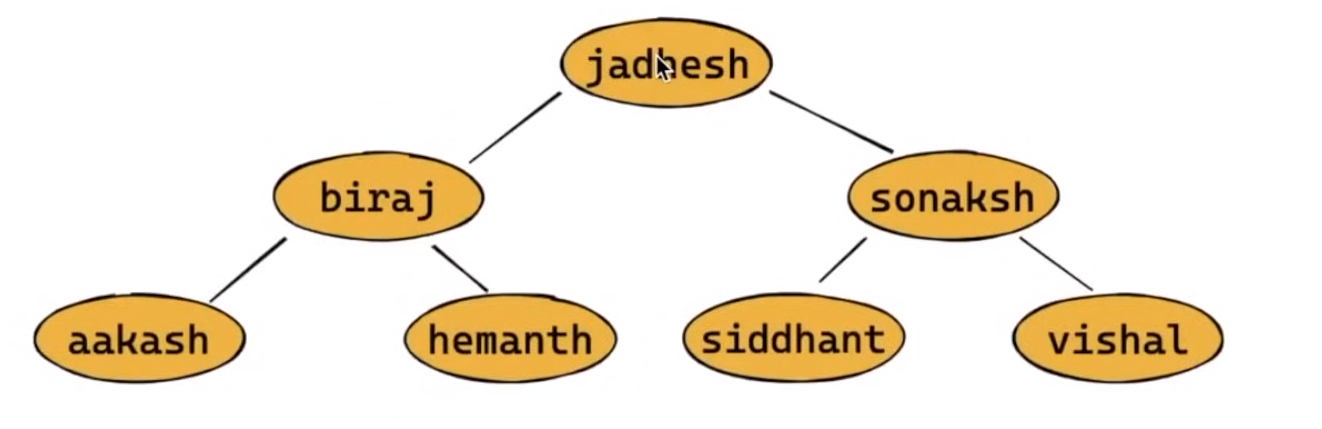

In [75]:
def insert(node, key, value):
    if node is None:
        node = BSTNode(key, value)
    elif key < node.key:
        node.left = insert(node.left, key, value)
        node.left.parent = node
    elif key > node.key:
        node.right = insert(node.right, key, value)
        node.right.parent = node
    return node

In [76]:
tree = insert(None, jadhesh.username, jadhesh)

In [77]:
tree.key, tree.value

('jadhesh',
 User(username = 'jadhesh', name = 'Jadhesh Verma', email = 'jadhesh@example.com'))

In [78]:
insert(tree, biraj.username, biraj)
insert(tree, sonaksh.username, sonaksh)

In [79]:
insert(tree, aakash.username, aakash)
insert(tree, hemanth.username, hemanth)
insert(tree, siddhant.username, siddhant)
insert(tree, vishal.username, vishal)

In [80]:
display_keys(tree)

		vishal
	sonaksh
		siddhant
jadhesh
		hemanth
	biraj
		aakash


### Finding Key

In [87]:
def find(node, key):
    if node is None:
        return None
    if key == node.key:
        return node
    if key < node.key:
        return find(node.left, key)
    if key > node.key:
        return find(node.right, key)

In [88]:
node = find(tree, 'hemanth')

In [89]:
node.key, node.value

('hemanth',
 User(username = 'hemanth', name = 'Hemanth Jain', email = 'hemanth@example.com'))

In [91]:
tanya = User('tanya', 'Tanya Singh', 'tanya@example.com')

User Created!


In [92]:
node = find(tree, tanya)
print(node)

TypeError: '<' not supported between instances of 'User' and 'str'

### Updating a value in BST

In [93]:
def update(node, key, value):
    target = find(node, key)
    if target is not None:
        target.value = value

In [94]:
update(tree, 'hemanth', User('hemanth', 'Hemanth J', 'hemanthj@example.com'))

User Created!


In [95]:
node = find(tree, 'hemanth')
node.value

User(username = 'hemanth', name = 'Hemanth J', email = 'hemanthj@example.com')

### List the nodes

In [96]:
def list_all(node):
    if node is None:
        return []
    return list_all(node.left) + [(node.key, node.value)] + list_all(node.right)

In [97]:
list_all(tree)

[('aakash',
  User(username = 'aakash', name = 'Aakash Rai', email = 'aakash@example.com')),
 ('biraj',
  User(username = 'biraj', name = 'Biraj Das', email = 'biraj@example.com')),
 ('hemanth',
  User(username = 'hemanth', name = 'Hemanth J', email = 'hemanthj@example.com')),
 ('jadhesh',
  User(username = 'jadhesh', name = 'Jadhesh Verma', email = 'jadhesh@example.com')),
 ('siddhant',
  User(username = 'siddhant', name = 'Siddhant U', email = 'siddhantu@example.com')),
 ('sonaksh',
  User(username = 'sonaksh', name = 'Sonaksh Kumar', email = 'sonaksh@example.com')),
 ('vishal',
  User(username = 'vishal', name = 'Vishal Goel', email = 'vishal@example.com'))]